# Team Project 4 - Linear Algebra and Data Compression

Linear algebra provides many powerful and exciting applications. Examples include:
<ul>
    <li>Face recognition via Eigenface;</li>
    <li>Data compression using Singular Value Decomposition;</li>
    <li>JPEG/MPEG compression via discrete cosine transform;</li>
    <li>Signal/sound compression via Fourier series.</li>
</ul>

A common feature is that by using techniques from linear algebra, one may find a very nice approximation of given data (in a very big or even infinite-dimensional vector space) in a reasonable small vector space.

In this project, we investigate how to compress continuous sound data by using finitely many numbers.

Sound data is given as a continuous function $f(x)$. If we divide the time interval into reasonably small subintervals, then on each interval, the function $f(x)$ looks like a periodic function, because the sound is a vibration that propagates as an (in general very complicated) wave of pressure and a wave is periodic. From now on, for simplicity, assume that the period of $f(x)$ is $2\pi$ and we will assume that $f \in C[-\pi, \pi]$.

On $C[-\pi, \pi]$, the following formula yields an inner product:
$$\langle g, h\rangle = \frac{1}{\pi}\int_{-\pi}^{\pi}g(x)h(x)dx.$$
Furthermore, we know that the following set is an orthonormal set.
$$\mathcal{T}_n := \{\frac{1}{\sqrt{2}}, \sin x, \cos x, \sin 2x, \cos 2x, \cdots, \sin nx, \cos nx\}$$
Let $W_n$ be the sub vector space of $C[-\pi, \pi]$ spanned by $\mathcal{T}_n$. Then for any $f \in C[-\pi, \pi]$, its best approximation in $W_n$ is given by
$$S_n(x) := \langle f(x), 1\rangle \frac{1}{2} + \sum_{k=1}^n \langle f(x), \cos kx\rangle \cos kx + \sum_{k=1}^n \langle f(x), \sin kx\rangle \sin kx.$$

##### 1. (10 pts) Construct a function **Simpson(f, m)** which evaluates the definite integral $$\int_{-\pi}^{\pi}f(x)dx$$ with $m$ intervals by using the Simpson's rule. Note that $m$ has to be an even number.

In [ ]:
import numpy as np

In [ ]:
# LaTeX rendering issue. The square above is T. Ex) Tn := {1/√2, sin} ...

#def f(x):# depends on this integrand function
#    return (x**2) # answer is 20.671
f = lambda x: -x**3*np.sin(x)

In [ ]:
def Simpson(f, m):
  if m % 2 != 0:
    print("The amount of intervals must be even to run Simpson's Rule")
    return 0

  b = np.pi # bounds
  a = -np.pi
  h = (b - a) / m # size of each interval

  x = np.linspace(a, b, m + 1)
  y = f(x)

  S = y[0] + y[-1]                  # f(x0) + f(xn)
  S += 4 * np.sum(y[1:-1:2])        # 4 * odd
  S += 2 * np.sum(y[2:-2:2])        # 2 * even

  return (h / 3) * S

m = int(input("how many intervals would you like?"))
print(Simpson(f, m))

how many intervals would you like?200
-24.313441240870564


##### 2. (10 pts) Create a function **FourierCoeff(f, n)** which returns the list of Fourier coefficients $a_0, a_1, \cdots, a_n$ and $b_1, b_2, \cdots, b_n$ where $a_0 = \langle f(x), 1\rangle$, $a_k = \langle f(x), \cos kx\rangle$ for $k \ge 1$, $b_k = \langle f(x), \sin kx\rangle$. To calculate each coefficient, use the function Simpson(f, m) with $m = 200$.

In [ ]:
def FourierCoeff(f, n):
  list_a = [] # a coefficients
  list_b = [] # b coefficients

  a0 = (1/np.pi) * Simpson(f, 200)
  list_a.append(a0)

  for i in range(1, n+1):
    f_cos_ks = lambda x: f(x) * np.cos(i * x)
    f_sin_ks = lambda x: f(x) * np.sin(i * x)

    a_k = (1/np.pi) * Simpson(f_cos_ks, 200)
    b_k = (1/np.pi) * Simpson(f_sin_ks, 200)

    list_a.append(a_k)
    list_b.append(b_k)

  return list_a, list_b

n = int(input("How many coefficients would you like?"))
# NOTE: given the conditions: (len(range(list_a)) == len(range(list_b)) + 1)

list_a, list_b = FourierCoeff(f, n)
list_a = list(map(float, list_a)) # convert from numpy float -> python float
list_b = list(map(float, list_b)) # Makes ouput look cleaner
print("a_k coefficients:", list_a)
print("b_k coefficients:", list_b)

How many coefficients would you like?3
a_k coefficients: [-7.739208714117792, 4.184802432906013, 0.8019572952338619, -1.8111483000107305]
b_k coefficients: [9.945747928933696e-18, 2.166785269726764e-16, -1.6486811915683576e-16]


##### 3. (10 pts) Create a function **DiscreteFourierCoeff(f, n)** which returns the list of Fourier coefficients $a_0, a_1, \cdots, a_n$ and $b_1, b_2, \cdots, b_n$. We use $m = 100$. Here $a_0 = \langle \mathbf{y}, \phi_0\rangle$, $a_k = \langle \mathbf{y}, \phi_k\rangle$ for $k \ge 1$, $b_k = \langle \mathbf{y}, \psi_k\rangle$. Check the lecture notes for the definition of $\mathbf{y}$, $\phi_k$, and $\psi_k$.

Note that the initial data is a continuous function, but the approximation is recorded as a list of $2n+1$ numbers!

In [ ]:
def DiscreteFourierCoeff(f, n):
  m = 100
  xs = np.linspace(-np.pi, np.pi, m, endpoint=False)
  ys = np.array([f(x) for x in xs])
  list_a = [] # a coefficients
  list_b = [] # b coefficients

  a0 = (1/m) * np.sum(ys) * 2
  list_a.append(a0)

  for i in range(1, n+1):
    phi_k = np.cos(i * xs)
    psi_k = np.sin(i * xs)

    a_k = (2/m) * np.dot(ys, phi_k)
    b_k = (2/m) * np.dot(ys, psi_k)

    list_a.append(a_k)
    list_b.append(b_k)

  return list_a, list_b

n = int(input("How many coefficients would you like?"))
# NOTE: given the conditions: (len(range(list_a)) == len(range(list_b)) + 1)

list_a, list_b = DiscreteFourierCoeff(f, n)
list_a = list(map(float, list_a)) # convert from numpy float -> python float
list_b = list(map(float, list_b)) # Makes ouput look cleaner
print("a_k coefficients:", list_a)
print("b_k coefficients:", list_b)

How many coefficients would you like?3
a_k coefficients: [-7.732715214969139, 4.178307331613393, 0.8084572061216123, -1.8176562374477363]
b_k coefficients: [-3.2474023470285827e-17, 3.497202527569243e-17, -3.4305891460917336e-16]


##### 4. (10 pts) Create a function **FourierApprox(f)** which plots the graphs of $f(x)$ and the graph of continuous Fourier approximation $S_n(x)$ with $n = 2, 5, 10$ on the same plane (with different color). Test your FourierApprox(f) with $f(x) = \cosh(x)$ and $f(x) = \sqrt{\pi^2-x^2}$. Run the function with your favorite $f(x)$, too. Test your function with $f(x) = e^x$ as well. (Note that this one is continuous on $[-\pi, \pi]$, but does not continuously extend to $\mathbb{R}$ because $f(-\pi) \ne f(\pi)$. To get a 'periodic' continuous function $f(x)$ defined on $\mathbb{R}$, $f(-\pi) = f(\pi)$. See what happens near two boundary points.)

In [ ]:
import matplotlib.pyplot as plt

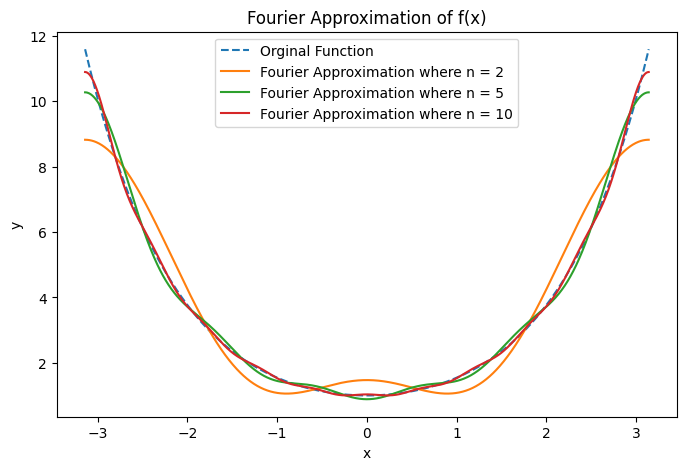

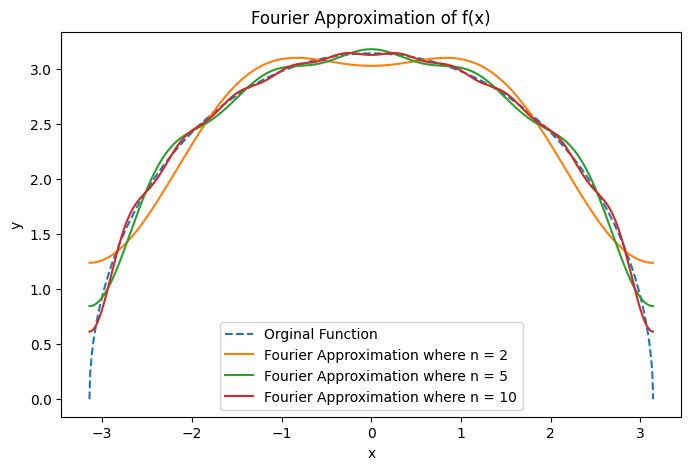

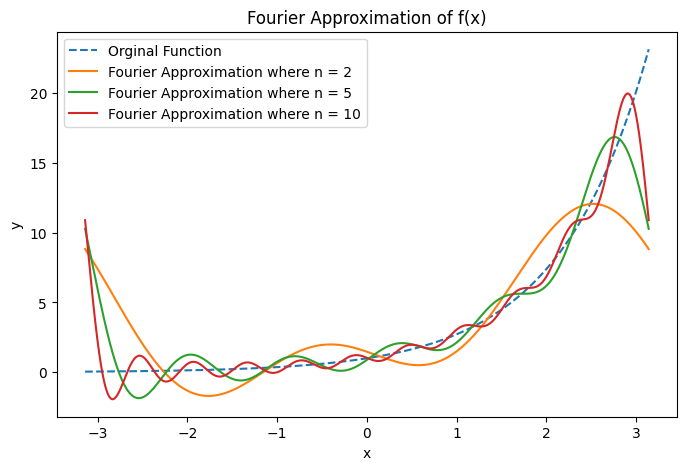

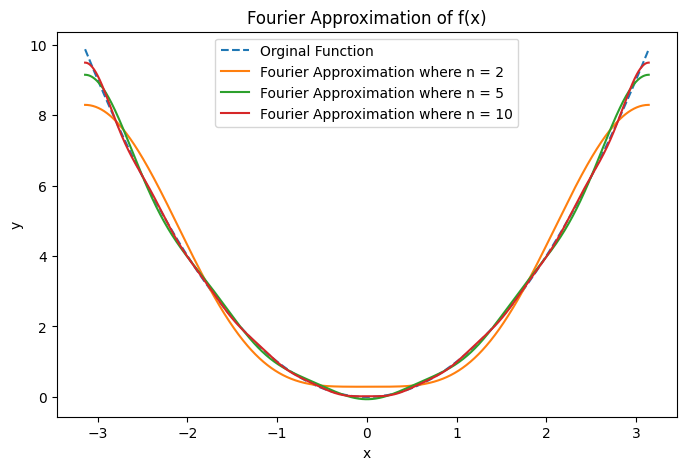

In [ ]:
def Sn(f, x_vals, n, m=1000): #continous
  a0 = (1 / np.pi) * Simpson(f, m)

  def ak(k):
    return (1 / np.pi) * Simpson(lambda x: f(x) * np.cos(k * x), m)

  def bk(k):
    return (1 / np.pi) * Simpson(lambda x: f(x) * np.sin(k * x), m)

  result = np.full_like(x_vals, a0 / 2)
  for i in range(1, n + 1):
    result += ak(i) * np.cos(i * x_vals) + bk(i) * np.sin(i * x_vals)
  return result

def FourierApprox(f):
  x = np.linspace(-np.pi, np.pi, 1000)
  y = f(x)

  plt.figure(figsize=(8,5))
  plt.plot(x, y, label="Orginal Function", linestyle="dashed")

  for i in [2, 5, 10]:
    y_approx = Sn(f, x, i)
    plt.plot(x, y_approx, label=f"Fourier Approximation where n = {i}"  )

  plt.title("Fourier Approximation of f(x)")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

# test with 4 functions
FourierApprox(lambda x: np.cosh(x))
FourierApprox(lambda x: np.sqrt(np.pi**2 - x**2))
FourierApprox(lambda x: np.exp(x))
FourierApprox(lambda x: x**2) # Paulina's favorite function

5. (10 pts) The data below is a sample of a soundwave for a short period of time. For simplicity, assume that the time interval is $[-\pi, \pi]$, and the sample with length $2m = 200$ is obtained by taking evenly spaced time intervals. So $x_0 = -\pi$, $x_1 = -\pi + \frac{1}{100}\pi$, $x_2 = -\pi + \frac{2}{100}\pi$, $\cdots$. Create a function **DiscreteFourierApprox(y)** which plots the sample data $\mathbf{y}$ and the graph of discrete Fourier approximation $S_n(x)$ with $n = 2, 5, 10$ on the same plane.

In [ ]:
y=[-7.17825413156567,-7.1793701412743,-7.16733849160952,-7.13806099877736,-7.08753543897104,-7.0119731343661,-6.90791086656375,-6.7723143655052,-6.6026708521166,-6.39706840356452,-6.15426025346228,-5.87371252685991,-5.55563433152807,-5.20098957226975,-4.81149031259588,-4.38957196666856,-3.93835105256917,-3.46156666462669,-2.96350721727113,-2.44892436603452,-1.92293631436397,-1.39092296058753,-0.858415521897378,-0.330983387404726,0.185879002302009,0.686862476823865,1.16694798121946,1.62150342860695,2.04637026745253,2.4379377507971,2.79320322347624,3.10981711252415,3.38611170586787,3.62111322482392,3.81453712603986,3.96676699740945,4.07881782923126,4.15228483592808,4.18927936505413,4.19235375000885,4.1644172328551,4.10864529719514,4.02838490293486,3.92705820128905,3.8080673275458,3.67470282063315,3.5300581038571,3.37695228343203,3.21786328533368,3.05487306278144,2.88962627383662,2.7233034598531,2.55660936041168,2.38977658915586,2.22258447827461,2.05439248803604,1.88418718241784,1.71064140274916,1.53218393795494,1.34707770114348,1.15350418544073,0.949651793363313,0.733805518371333,0.504435407680138,0.260281253383451,0.00043104416958693,-0.275609139599575,-0.567855892600087,-0.875801749786061,-1.19838246884653,-1.53395948887067,-1.88031833194498,-2.23468329950084,-2.59374838823281,-2.95372392220828,-3.31039797935009,-3.65921129255264,-3.9953439385711,-4.3138118010466,-4.60957051616217,-4.87762438783055,-5.11313759997417,-5.31154496080349,-5.46865939080727,-5.58077341347654,-5.64475202486102,-5.65811450241788,-5.61910296106695,-5.52673576912185,-5.38084429156528,-5.18209182442877,-4.93197401219301,-4.63280048966559,-4.28765794965145,-3.9003552965237,-3.47535199210909,-3.01767112295422,-2.53279910638992,-2.02657429701372,-1.50506704645213,-0.974454,-0.44088957787058,0.0896223181513085,0.611353312630683,1.11896927449907,1.60763987011297,2.07313627689645,2.51191465040037,2.92118326546001,3.29895163288898,3.64406031782336,3.9561906443194,4.23585395212723,4.48436056411675,4.70376911469609,4.89681736877206,5.06683611564488,5.21764814153265,5.35345465782678,5.4787118803975,5.59800071031138,5.71589265169831,5.83681521338724,5.96492007427387,6.10395724701381,6.25715835127125,6.42713190900982,6.61577330462839,6.82419171829347,7.05265594935557,7.30056060741856,7.56641367179835,7.84784591703997,8.14164218480438,8.44379396311453,8.74957222507196,9.05361899291466,9.35005564136536,9.63260554750755,9.89472834275533,10.12976273439,10.3310746466534,10.4922072898708,10.6070297040784,10.6698803427985,10.6757023626674,10.6201674633504,10.4997853754798,10.3119964163468,10.0552449162263,9.72903175352977,9.33394471420792,8.87166589871425,8.34495592640278,7.75761522002221,7.11442317940288,6.42105656106681,5.68398885733906,4.91037290334639,4.10790932281203,3.28470374479894,2.44911597599151,1.60960449085604,0.774569700989817,-0.0478005170560671,-0.849679619491468,-1.62374224545972,-2.36329206555511,-3.06237486423341,-3.71587444498204,-4.31958935554704,-4.87028888421989,-5.36574726627127,-5.80475555039019,-6.18711109624707,-6.51358519363048,-6.78586979867676,-7.00650486156638,-7.17878816141456,-7.30666995758652,-7.39463510315462,-7.44757553792188,-7.47065627918407,-7.46917815374162,-7.44844056198358,-7.41360753341908,-7.36958022399698,-7.32087882196741,-7.27153657572034,-7.22500834046981,-7.18409566882062,-7.15089005243946,-7.12673546860872,-7.11221090753357,-7.10713306561076,-7.11057889840862,-7.12092724677407,-7.13591829186413,-7.15272917097689,-7.16806370593434]

Again, the initial data has 200 samples, but even with small number of coordinates, we already have a very descent approximation.

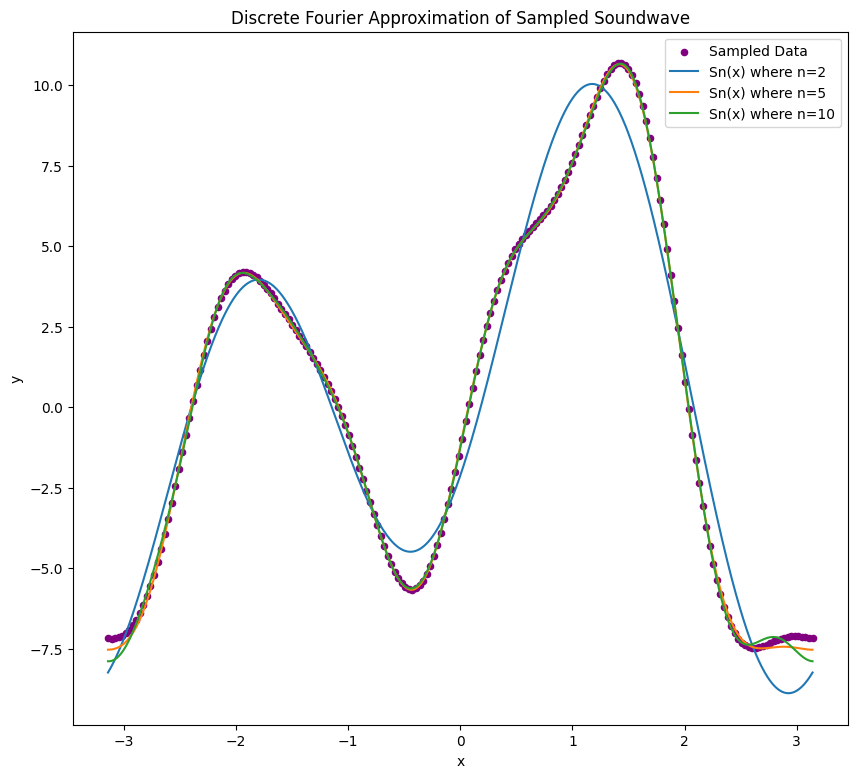

In [ ]:
def DiscreteFourierApprox(y):
  m = len(y) // 2
  x = np.linspace(-np.pi, np.pi, 2*m)
  def Sn_discrete(y, x_vals, n): #discrete case so you can't use code above
    m = len(y) // 2
    a0 = (1 / np.pi) * np.sum(y) * (np.pi / m)

    def ak(k):
      return (1 / np.pi) * np.sum(y * np.cos(k * x)) * (np.pi / m)

    def bk(k):
      return (1 / np.pi) * np.sum(y * np.sin(k * x)) * (np.pi / m)

    result = np.full_like(x_vals, a0 / 2)
    for i in range(1, n + 1):
      result += ak(i) * np.cos(i * x_vals) + bk(i) * np.sin(i * x_vals)
    return result

  x_vals = np.linspace(-np.pi, np.pi, 1000)

  plt.figure(figsize=(10, 9))
  plt.scatter(x, y, color='purple', label="Sampled Data", s=20)

  for i in [2, 5, 10]:
    y_approx = Sn_discrete(y, x_vals, i)
    plt.plot(x_vals, y_approx, label=f"Sn(x) where n={i}")

  plt.title("Discrete Fourier Approximation of Sampled Soundwave")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.legend()
  plt.show()

DiscreteFourierApprox(y)